# **Coffee Shop Sales Analysis** <a id=0></a>
**Objective:** Coffee shop stores typically offer a wide range of products, and their sales can vary based on several factors such as product type, season, and time of day. Having worked in a coffee shop, I am particularly interested in conducting a sales analysis to understand the key factors influencing the popularity of different products and the overall performance of the store. I have identified three key questions and will analyze each one in detail to suggest strategies for improving overall performance.

**Data Source:** https://www.kaggle.com/datasets/divu2001/coffee-shop-sales-analysis/data

The key questions are as follows:
* What kind of behaviors do people exhibit?
* Are there any differences between three different locations?
* How have sales trend changed over time? 

## **Analysis Overview**
### [1.Data Cleaning and Preprocessing](#1)
### [2.Exploratory Data Analysis (EDA)](#2)
### [3.Customer Analysis](#3)
### [4.Geographical Analysis](#4)
### [5.Trend Analysis](#5)
### [6.Summary of Analysis](#6)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("coffee_sales.csv")
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   store_id          149116 non-null  int64  
 4   store_location    149116 non-null  object 
 5   product_id        149116 non-null  int64  
 6   transaction_qty   149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   Total_Bill        149116 non-null  float64
 9   product_category  149116 non-null  object 
 10  product_type      149116 non-null  object 
 11  product_detail    149116 non-null  object 
 12  Size              149116 non-null  object 
 13  Month Name        149116 non-null  object 
 14  Day Name          149116 non-null  object 
 15  Hour              149116 non-null  int64  
 16  Month             14

## **Data Cleaning and Preprocessing** <a id="1"></a>
### Key steps in the data cleaning process
* Making column names consistent
* Checking missing values
* Checking duplicated values
* Handling outliers

In [595]:
df = df.rename(columns = {"Total_Bill" : "total_bill", "Size": "size", "Month Name": "month_name", "Day Name": "day",
                       "Hour": "hour", "Month": "month", "Day of Week": "day_of_week"})

In [147]:
# Check for any missing values
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
store_id            0
store_location      0
product_id          0
transaction_qty     0
unit_price          0
total_bill          0
product_category    0
product_type        0
product_detail      0
size                0
month_name          0
day                 0
hour                0
month               0
day_of_week         0
dtype: int64

In [1264]:
# Check for any duplicated values
df[df.duplicated()]

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,total_bill,product_category,product_type,product_detail,size,month_name,day,hour,month,day_of_week


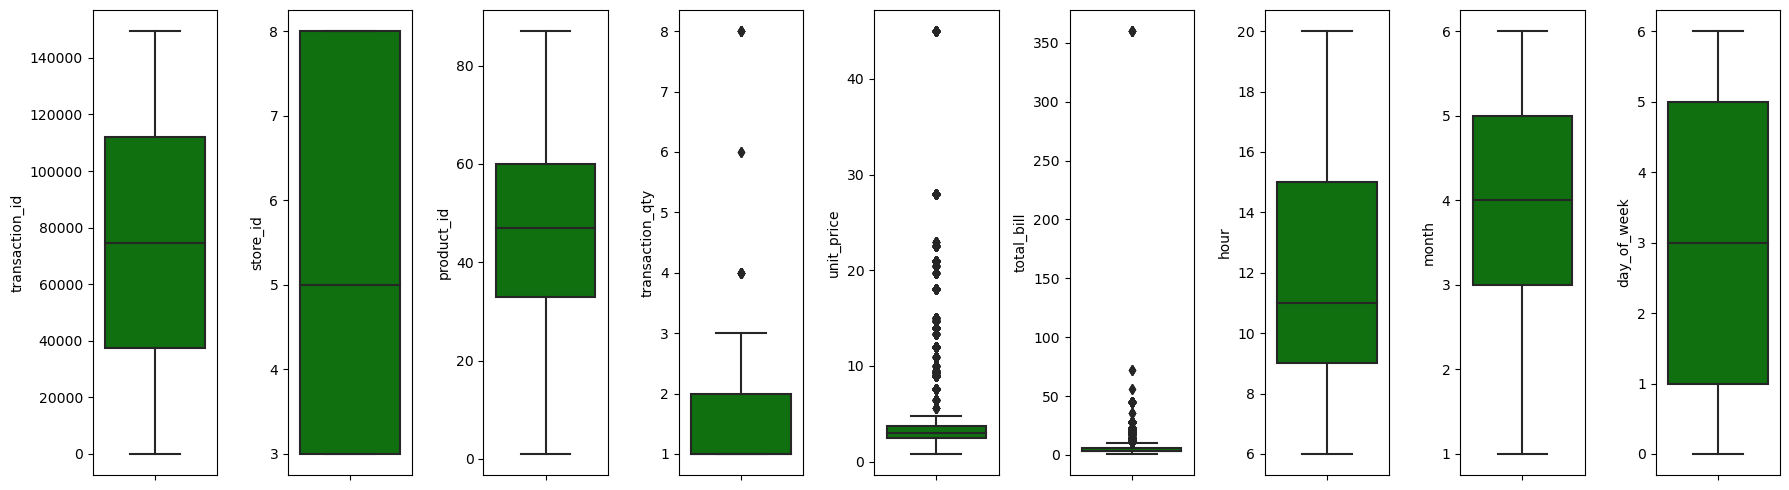

In [483]:
# Check for any outliers
df_outlier = df.select_dtypes(exclude=['object'])
fig, ax = plt.subplots(nrows=1, ncols=len(x.columns), figsize=(18, 5))
for index, column in enumerate(df_outlier):
    sns.boxplot(data=df_outlier, y=df_outlier[column], ax=ax[index], color='g')
    
plt.tight_layout()
plt.show()

In [256]:
df[df['total_bill'] >= 300].head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,total_bill,product_category,product_type,product_detail,size,month_name,day,hour,month,day_of_week
149082,9340,17-01-2023,09:05:20,8,Hell's Kitchen,8,8,45.0,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,January,Tuesday,9,1,1
149083,9395,17-01-2023,09:55:47,8,Hell's Kitchen,8,8,45.0,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,January,Tuesday,9,1,1
149096,68976,17-04-2023,09:55:47,8,Hell's Kitchen,8,8,45.0,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,April,Monday,9,4,0
149097,69151,17-04-2023,11:18:31,8,Hell's Kitchen,8,8,45.0,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,April,Monday,11,4,0
149103,98233,17-05-2023,09:05:20,8,Hell's Kitchen,8,8,45.0,360.0,Coffee beans,Premium Beans,Civet Cat,Not Defined,May,Wednesday,9,5,2


In [284]:
df[(df['unit_price'] > 5) & (df['unit_price'] < 30)].head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,total_bill,product_category,product_type,product_detail,size,month_name,day,hour,month,day_of_week
65442,3293,07-01-2023,07:07:56,5,Lower Manhattan,12,1,8.95,8.95,Loose Tea,Herbal tea,Peppermint,Not Defined,January,Saturday,7,1,5
65443,4393,08-01-2023,19:58:16,3,Astoria,12,1,8.95,8.95,Loose Tea,Herbal tea,Peppermint,Not Defined,January,Sunday,19,1,6
65444,4551,09-01-2023,08:41:24,5,Lower Manhattan,12,1,8.95,8.95,Loose Tea,Herbal tea,Peppermint,Not Defined,January,Monday,8,1,0
65445,4586,09-01-2023,09:06:53,3,Astoria,12,1,8.95,8.95,Loose Tea,Herbal tea,Peppermint,Not Defined,January,Monday,9,1,0
65446,4786,09-01-2023,11:53:17,8,Hell's Kitchen,12,1,8.95,8.95,Loose Tea,Herbal tea,Peppermint,Not Defined,January,Monday,11,1,0


In [726]:
# Average price of each product
mean_price = df.groupby('product_type')['unit_price'].mean().round(2)
median_price = df.groupby('product_type')['unit_price'].median()
df_prouct_type = pd.DataFrame({'mean':mean_price.values, 'median':median_price.values}, index = mean_price.index).transpose()
pd.set_option('display.max_columns', None)
df_prouct_type

product_type,Barista Espresso,Biscotti,Black tea,Brewed Black tea,Brewed Chai tea,Brewed Green tea,Brewed herbal tea,Chai tea,Clothing,Drinking Chocolate,Drip coffee,Espresso Beans,Gourmet Beans,Gourmet brewed coffee,Green beans,Green tea,Herbal tea,Hot chocolate,House blend Beans,Housewares,Organic Beans,Organic Chocolate,Organic brewed coffee,Pastry,Premium Beans,Premium brewed coffee,Regular syrup,Scone,Sugar free syrup
mean,3.66,3.42,8.95,2.74,2.94,2.74,2.74,9.71,27.89,10.26,2.48,17.43,18.57,2.7,10.0,9.25,8.95,4.15,18.0,13.45,20.29,7.6,2.9,3.69,34.03,3.12,0.8,3.53,0.8
median,3.75,3.50,8.95,2.50,2.55,2.50,2.50,9.50,28.00,13.33,2.50,14.75,21.00,2.5,10.0,9.25,8.95,4.50,18.0,14.00,18.00,7.6,3.0,3.75,45.00,3.10,0.8,3.25,0.8


**The reasons not to remove outliers**
* **I checked the data for outliers, specifically those that are farthest from the mean in terms of Total Bill. The product category is coffee beans all of which are sold in Hell's Kitchen, and the unit price is relatively high. Additionally, the number of transactions is also high, so a total bill of 360, which is far from the mean, is an inevitable result.**
* **Some of the locations sell different types of beans, and Astoria sells clothing that is more expensive than a cup of coffee or tea. Regarding unit price, I identified outliers, but I confirmed that they are simply more expensive than regular drinks.**

[To the top](#0)

## **Exploratory Data Analysis (EDA)** <a id=2></a>

### 1. Customer Analysis <a id=3></a>
What kind of behaviors do people exhibit?
#### Questions for more detailed analysis
* Correlation between each variables
* What categories of drinks do people buy the most?
* What type of product is in the top 10 best sellers?
* Which size of drink do people order the most?

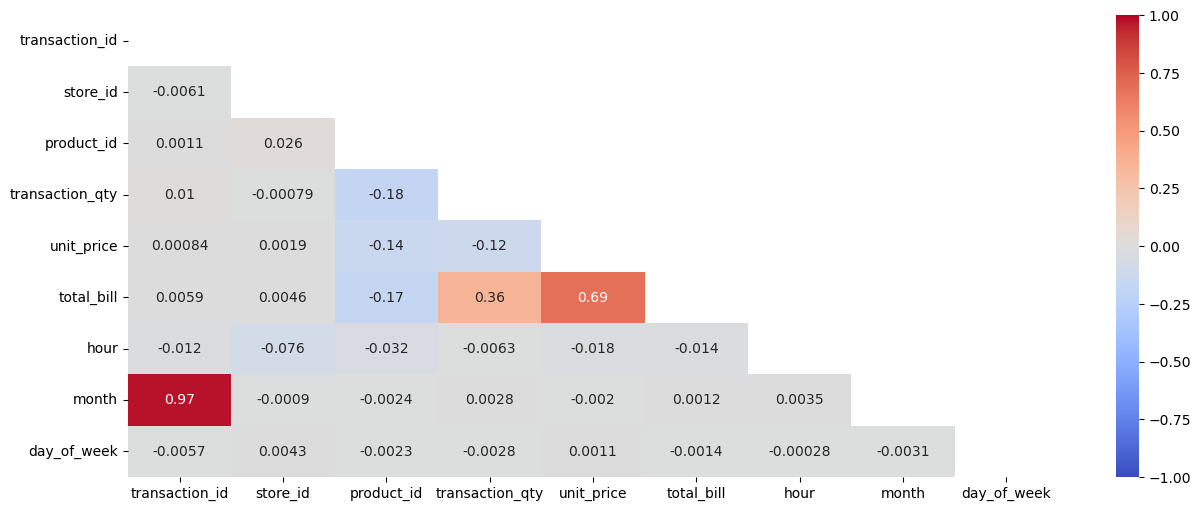

In [573]:
corr = df_outlier.corr()
plt.figure(figsize=(15,6))
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, vmax=1, vmin=-1, annot=True, cmap='coolwarm', mask=mask)
plt.show()

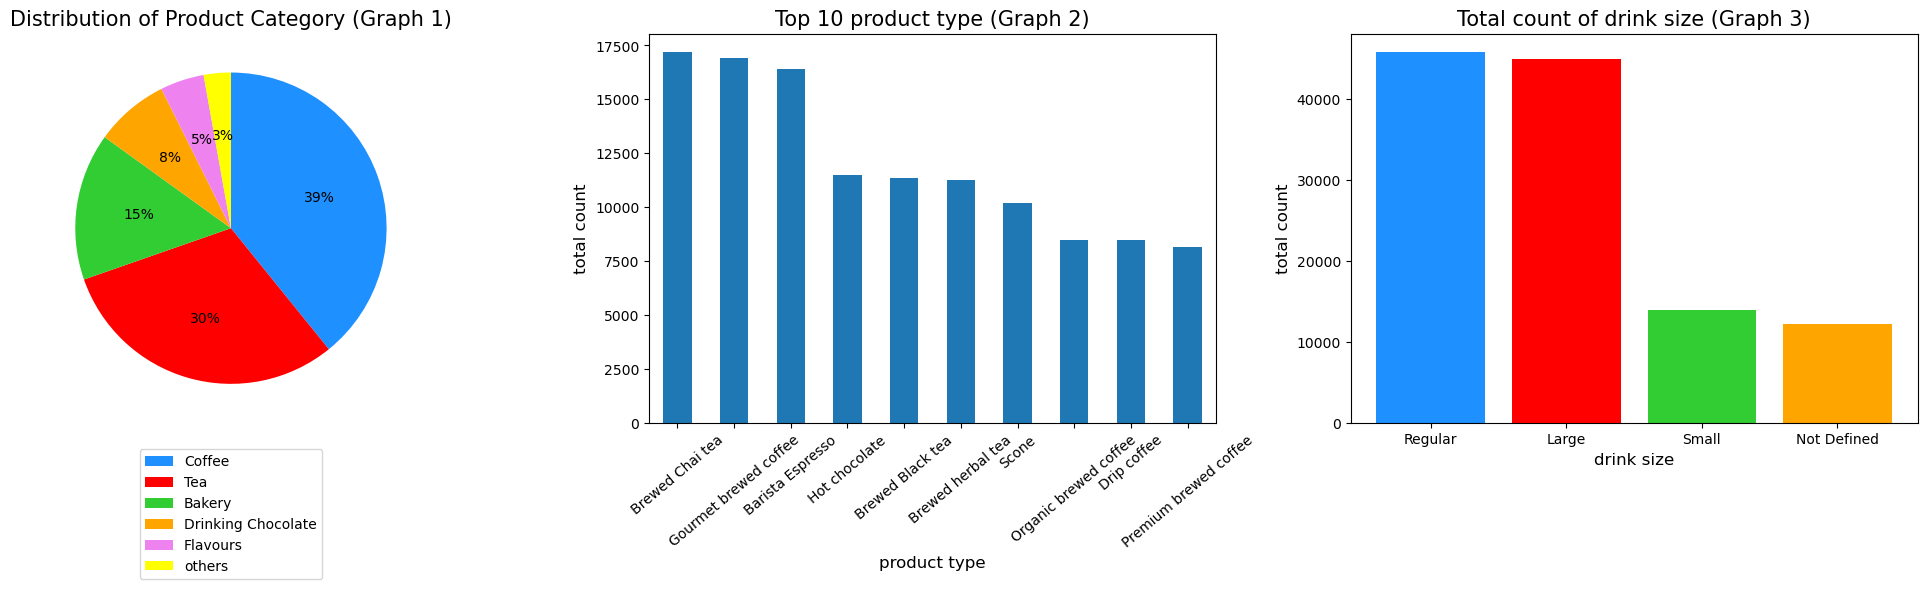

In [724]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
df_cnt_cat = pd.DataFrame(data={'product_category':cnt_cat.index, 'count':cnt_cat.values})
others = pd.DataFrame(data={'product_category':'others', 'count':df_cnt_cat.iloc[5:]['count'].sum()}, index=[4])
df_category = pd.concat([df_cnt_cat, others]).drop([5,6,7,8], axis=0).reset_index(drop=True)
colors = ["dodgerblue", "red", "limegreen", "orange", "violet", "yellow"]
plt.pie(df_category['count'], counterclock = False, startangle=90, autopct='%1.0f%%', colors=colors)
plt.title("Distribution of Product Category (Graph 1)", fontsize = 15)
plt.legend(labels = df_category['product_category'], loc='upper center', bbox_to_anchor=(0.5, -0.05))

plt.subplot(1,3,2)
product_type = df.groupby("product_type")["product_type"].count().sort_values(ascending = False).head(10)
product_type.plot(kind = "bar")
plt.title("Top 10 product type (Graph 2)", fontsize = 15)
plt.xlabel("product type", fontsize = 12)
plt.ylabel("total count", fontsize = 12)
plt.xticks(rotation = 40, fontsize = 10)

plt.subplot(1,3,3)
df_drinks = df[df['product_type'].str.contains('|'.join(['coffee', 'tea', 'Barista', 'chocolate', 'Drinking']))]
cnt_size = df_drinks.groupby("size")["size"].value_counts().sort_values(ascending = False)
plt.bar(cnt_size.index, cnt_size.values, color=colors)
plt.title("Total count of drink size (Graph 3)", fontsize = 15)
plt.xlabel("drink size", fontsize = 12)
plt.ylabel("total count", fontsize = 12)
plt.xticks(rotation=360)

plt.tight_layout()
plt.show()

### **Insights**
* **Coffee is the product category that customers bought the most. (Graph 1)**
* **Brewed Chai tea is the most popular drink, even though tea is the second-highest product category. (Graph 2)**
* **Scones are the snacks that could potentially affect sales, as they are in the top 10 products surpassing various drinks. (Graph 2)**
* **Customers mostly order regular or large size, both of which are almost three times more than small. (Graph 3)**

[To the top](#0)

### 2. Geographical Analysis <a id=4></a>
Are there any differences between three different locations?

#### Questions for more detailed analysis
* Which store location has the highest sales?
* Which size of drink is sold the most by location?
* What kind of products are popular at different store locations?

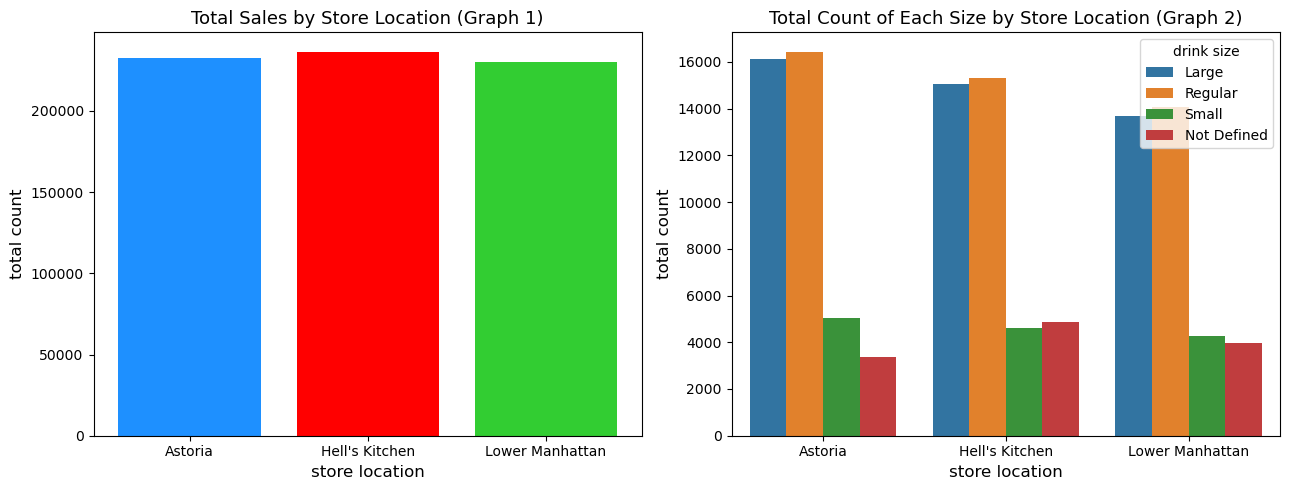

In [720]:
sales_location = df[["store_location", "total_bill"]].groupby("store_location")["total_bill"].sum()

plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.bar(sales_location.index, sales_location.values, color=colors)
plt.title("Total Sales by Store Location (Graph 1)", fontsize = 13)
plt.xlabel("store location", fontsize = 12)
plt.ylabel("total count", fontsize = 12)
plt.xticks(rotation = 360)

plt.subplot(1,2,2)
cnt_size_loc = df_drinks[["store_location", "size"]].groupby(["store_location", "size"])[["size"]].count().rename(columns={"size": "total_count"}).reset_index()
cnt_size_loc["size"] = pd.Categorical(cnt_size_loc["size"], categories=["Large", "Regular", "Small", "Not Defined"], ordered=True)
sns.barplot(data=cnt_size_loc, x="store_location", y="total_count", hue="size")
plt.title("Total Count of Each Size by Store Location (Graph 2)", fontsize = 13)
plt.xlabel("store location", fontsize = 12)
plt.ylabel("total count", fontsize = 12)
plt.xticks(rotation=360)
plt.legend(title="drink size")

plt.tight_layout()
plt.show()

### **Insights**
* **The sales among the three different locations are very close. (Graph 1)**
* **Regardless of the store location, regular and large size are more popular than small size. (Graph 2)**

In [1115]:
astoria = df[df['store_location'] == 'Astoria']
astoria_top10 = astoria.groupby(['store_location','product_type'])[['product_type']].count()\
.rename(columns={'product_type':'count'}).sort_values('count', ascending=False).reset_index().head(10)

hells_kitchen = df[df['store_location'] == "Hell's Kitchen"]
hells_kitchen_top10 = hells_kitchen.groupby(['store_location','product_type'])[['product_type']].count()\
.rename(columns={'product_type':'count'}).sort_values('count', ascending=False).reset_index().head(10)

manhattan = df[df['store_location'] == 'Lower Manhattan']
manhattan_top10 = manhattan.groupby(['store_location','product_type'])[['product_type']].count()\
.rename(columns={'product_type':'count'}).sort_values('count', ascending=False).reset_index().head(10)

# Visualization
def visualize(store):
    plt.figure(figsize=(20,8))
    
    for i, store in enumerate(store):
        plt.subplot(1,3,i+1)
        plt.pie(store['count'], counterclock = False, startangle=90, autopct='%1.0f%%')
        plt.legend(store['product_type'], loc='center')
        plt.title(store['store_location'][0], fontsize=15, y=0.95)
    plt.suptitle('Top 10 Products by Store Locations', fontsize=20)
    plt.tight_layout()
    plt.show()

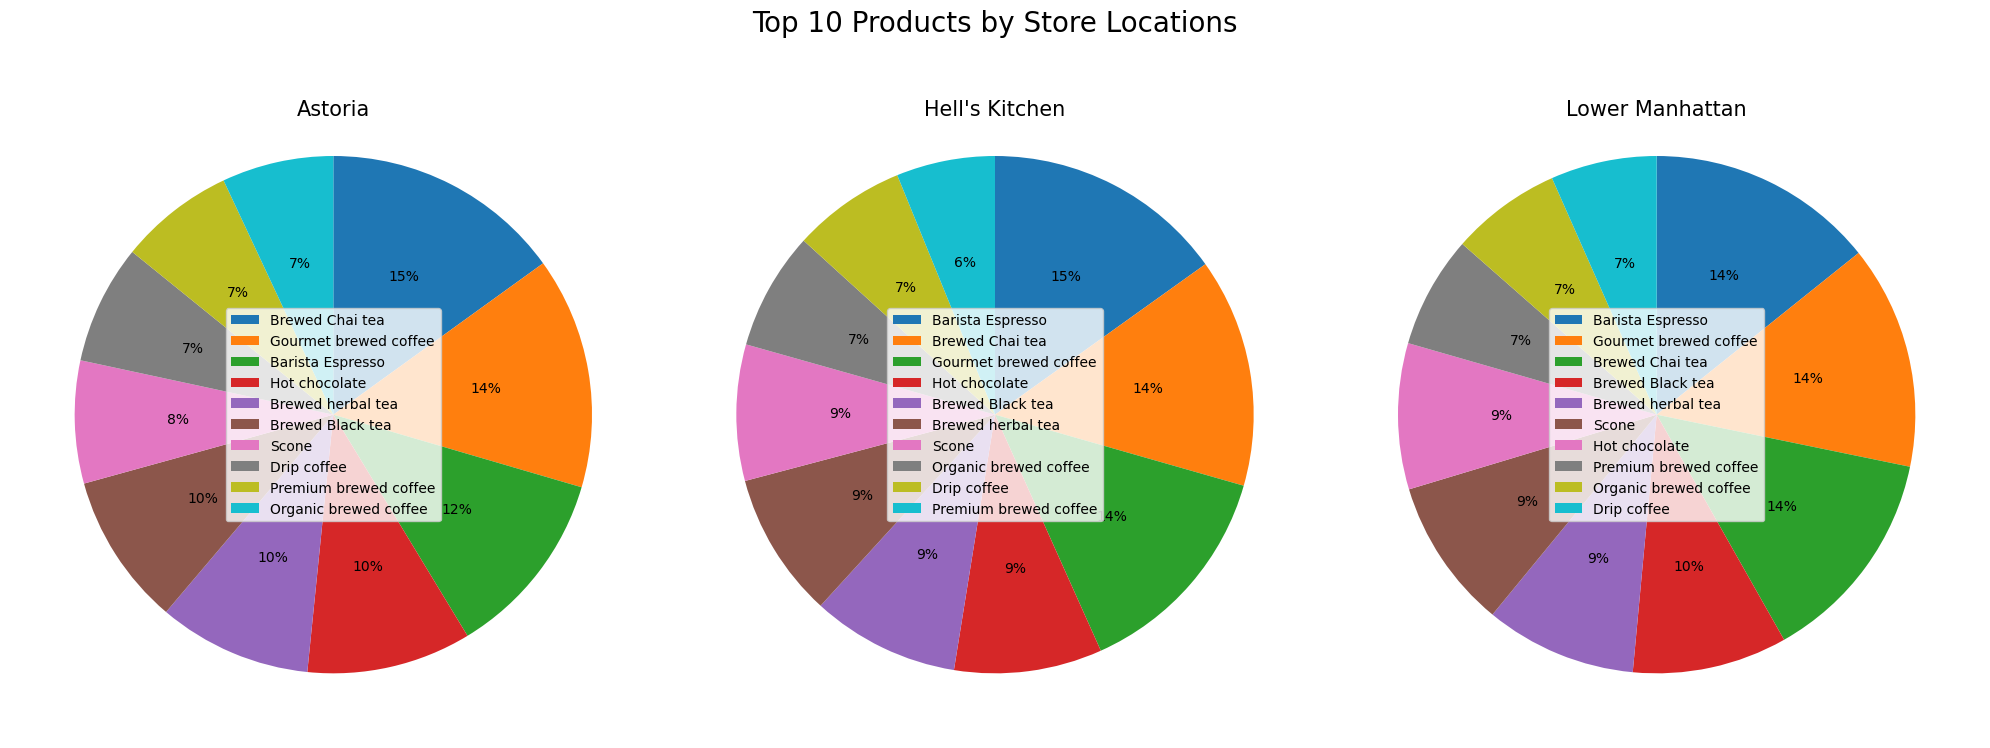

In [1112]:
visualize([astoria_top10, hells_kitchen_top10, manhattan_top10])

### **Insights**
* **The order of popularity is different, but the top 10 products are the same across three different locations.**
* **The distribution of each product across the three locations is similar and there is no product that is particularly more sold at any of the stores.** 
* **Since Brewed Chai Tea, Gourmet Brewed Coffee, and Barista Espresso are the top 3 products at all of the stores, each store needs to consider how to boost sales of other products in order to surpass its competitors.** 

[To the top](#0)

### 3. Trend Analysis <a id=5></a>
How have sales trend changed over time?

#### Comprehensive Sales Analysis
* Monthly Sales Trend
* Sales Trend by Store location
* Sales Trend by Product category
* Sales Trend by Hour
* Total Sales by Day of the week

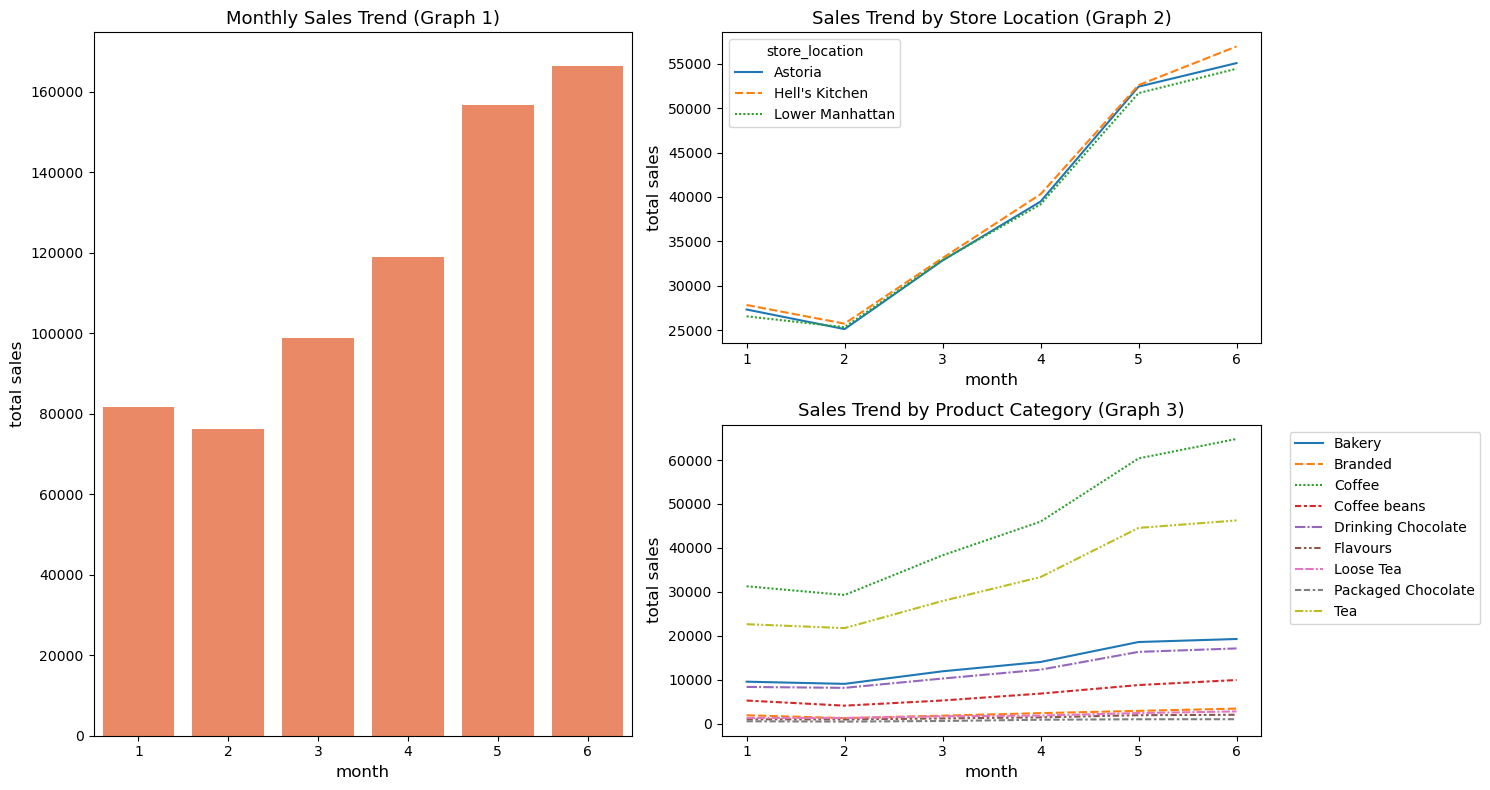

In [565]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)

# Monthly Sales Trend
monthly_sales = df.groupby("month")[["total_bill"]].sum().reset_index()
sns.barplot(data=monthly_sales, x="month", y="total_bill", color="coral")
plt.title("Monthly Sales Trend (Graph 1)", fontsize = 13)
plt.xlabel("month", fontsize = 12)
plt.ylabel("total sales", fontsize = 12)

# Sales Trend by Store Location
sales_location_month = df[["month", "store_location", "total_bill"]].groupby(["month", "store_location"])["total_bill"].sum().unstack()
plt.subplot(2,2,2)
sns.lineplot(data=sales_location_month)
plt.title("Sales Trend by Store Location (Graph 2)", fontsize = 13)
plt.xlabel("month", fontsize = 12)
plt.ylabel("total sales", fontsize = 12)

# Sales Trend by Product Category
sales_category_month = df[["month", "total_bill", "product_category"]].groupby(["month", "product_category"])["total_bill"].sum().unstack()
plt.subplot(2,2,4)
sns.lineplot(data = sales_category_month)
plt.title("Sales Trend by Product Category (Graph 3)", fontsize = 13)
plt.xlabel("month", fontsize = 12)
plt.ylabel("total sales", fontsize = 12)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.tight_layout()
plt.show()

In [1267]:
# What types of pastries do the stores sell?
pastry = df[df["product_type"] == 'Pastry']
pastry['product_detail'].unique()

array(['Almond Croissant', 'Chocolate Croissant', 'Croissant'],
      dtype=object)

### **Insights**
* **Since the sales have doubled from January to June, drinks tend to sell well in the summer season. (Graph 1)**
* **All sales among the three different locations decreased in February, but sales similarly increased for the rest of the months. (Graph 2)**
* **February is a transition month, which could affect sales because the demand for hot drinks diminishes. (Graph 1, 2)**
* **In the graph of the sales trend by product category, some of them are consistent, but sales remarkably increased for coffee and tea. (Graph 3)**

## Actionable recommendations
**Action Plan to Maintain Sales Performance**
* Even though this dataset does not include data for the second half of the year (after June), I can infer that sales are likely to gradually decrease, particularly after the summer season. This is supported by the fact that sales in January are roughly half of those in June. However, **drinks sold in small packets, for instance, bottled or canned brewed coffee (tea) which customers can enjoy and order online, could help prevent sales from dropping significantly.** The store manager should consider the content of promotions, such as **offering discounts to repeat customers and providing free drink tickets as exclusive privileges whenever the number of orders reaches three.**

**Strategies to Increase Bakery Sales**
* Bakery products are the third most popular product category, following coffee and tea. However, sales have not seen the expected increase from January to June, especially when compared to the top two product categories. Even though scone is ranked in the top 10, sales of pastry are out of the top rankings. **Launching to sell new pastries could contribute to increasing bakery, and overall sales.** From the data, the pastry selection is only three different types of croissants. **Introducing pastries like biscuits and muffins—both of which are similar to scones and pair well with coffee and tea—could help boost sales in this category.** **Additionally, offering seasonal flavors could attract more customers by providing variety and unique taste experiences. Croissants are sold at 3.75, but it is slightly more expensive than the top 3 drinks (Brewed Chai tea, Gourmet Brewed coffee, and Barista Espresso as they are sold for $3). I believe that these pastries are sold at the same price as the drinks or even lower. Focusing on quantity, rather than premium pricing, could help increase sales volume and overall profitability.** From my perspective, offering a more affordable price for pastries would likely attract more customers to purchase them alongside their drinks, ultimately boosting both bakery and overall store sales.

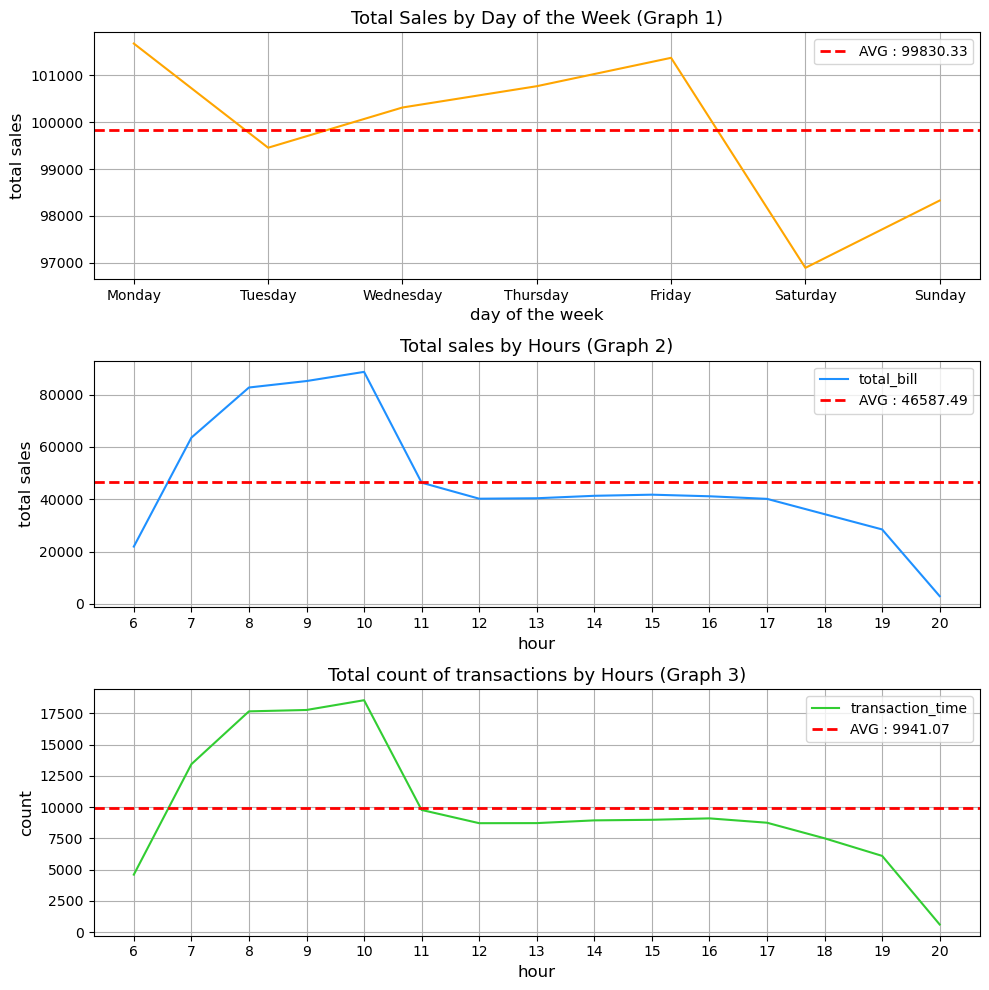

In [1242]:
sales_day_of_week = df[["day", "day_of_week", "total_bill"]].groupby(["day", "day_of_week"])["total_bill"].sum().sort_index(level = 1)
sales_day_of_week = pd.DataFrame(sales_day_of_week).reset_index()

plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.lineplot(data = sales_day_of_week, x="day", y="total_bill", color="orange")
plt.title("Total Sales by Day of the Week (Graph 1)", fontsize = 13)
plt.xlabel("day of the week", fontsize = 12)
plt.ylabel("total sales", fontsize = 12)
plt.grid()
sales_day_of_week_mean = sales_day_of_week["total_bill"].mean()
plt.axhline(sales_day_of_week_mean, linestyle='--', color='r', linewidth=2, label=f'AVG : {sales_day_of_week_mean.round(2)}')
plt.legend()

plt.subplot(3,1,2)
sales_drink_hours = df.groupby("hour")["total_bill"].sum()
sales_drink_hours.plot(kind = "line", color="dodgerblue")
plt.title("Total sales by Hours (Graph 2)", fontsize = 13)
plt.xlabel("hour", fontsize = 12)
plt.ylabel("total sales", fontsize = 12)
plt.xticks(np.arange(6, 21, step = 1))
plt.grid()
sales_hours_mean = sales_drink_hours.mean()
plt.axhline(sales_hours_mean, linestyle='--', color='r', linewidth=2, label=f'AVG : {sales_hours_mean.round(2)}')
plt.legend()

plt.subplot(3,1,3)
cnt_drink_hours = df.groupby("hour")["transaction_time"].count()
cnt_drink_hours.plot(kind = "line", color="limegreen")
plt.title("Total count of transactions by Hours (Graph 3)", fontsize = 13)
plt.xlabel("hour", fontsize = 12)
plt.ylabel("count", fontsize = 12)
plt.xticks(np.arange(6, 21, step = 1))
plt.grid()
cnt_drink_hours_mean = cnt_drink_hours.mean()
plt.axhline(cnt_drink_hours_mean, linestyle='--', color='r', linewidth=2, label=f'AVG : {cnt_drink_hours_mean.round(2)}')
plt.legend()

plt.tight_layout()
plt.show()

In [1271]:
# Correlation between sales and transactions by hour
cnt_drink_hours.corr(sales_drink_hours)

0.9994627701822706

### **Insights**
* **I expect that people buy drinks during breaks at work, which could explain why total sales on weekends are below average. (Graph 1)**
* **Drinks tend to sell very well in the morning, while sales are below average after 10 AM until closing. (Graphs 2, 3)**
* **People generally do not consume many drinks in a short period of time. If the store locations are situated close to business offices, people tend to buy drinks before starting work, which connects with my first insight. (Graphs 2, 3)**

## Actionable recommendations
**Strategy to Boost Sales on Weekends**
* As the graph shows, weekend sales are below average and lower than sales on weekdays, even though other circumstances are the same. The first possible reason is the location. While I could not identify the exact location of each store on the map, I infer that they are situated on business streets. The second possible reason is that each store does not differentiate between weekdays and weekends, as the products, prices, and opening times are the same every day. One possible solution to the location issue is using a food truck (kitchen car) and moving to areas where people tend to gather. However, this may come with additional costs such as rental fees, fuel, and a business license from the government. **Social media marketing is a key strategy to attract customers. Advertising through social media is more effective than traditional methods like paper advertisements because it doesn't matter where the ad is posted.
Holding special events only on weekends could attract more customers, as people are often drawn to exclusive offers, such as "buy one, get one free," special discounts, or limited-edition drinks. Combining SNS marketing with weekend events would be beneficial for both customers and the stores.**

[To the top](#0)

## Sammary of Analysis <a id=6></a>
### What kind of behaviors do people exhibit?
* **Top 3 Product Category:** Coffee (39%), Tea (30%), Bakery (15%)
* **Top 5 Best-Selling Product Type:** "Brewed Chai Tea", "Gourmet brewed coffee", "Barista Espresso", "Hot chocolate", "Brewed Black Tea"
* **Popularity of Drink Sizes:** Regular is the most popular size and followed closely by Large.

### Are there any differences between three different locations?
* **Sales by Store Location:** Sales are similar across the three different location.
* **Popularity of Drink Sizes by Store Location:** Regular and Large are the most popular drink sizes, and the gap between them is insignificant. 
* **Top 10 Products by Store Location:** All products are the same across different locations, including the top 3. Each store needs to differentiate its products in order to surpass the sales of competing stores.

### How have sales trend changed over time?
* **Monthly Sales Trend:** Sales peak in May and June while Febrary is at its lowest.
* **Sales Trend by Product Category:** The sales trend is similar to the overall monthly sales trend, with peaks in May and June, especially for coffee and tea.
* **Sales Trend by Day of the Week:** Sales are relatively lower on weekends. 
* **Sales Trend by Hour of the Day:** Sales peak between 8AM to 10AM, but drop below average after 11AM. 
* **Total Transactions by Hour of the Day:** Sales and transactions by hour are highly correlated, as the shape of their line graphs fluctuate similarly.

[To the top](#0)